In [1]:
import pandas as pd
import nltk
import pymorphy2
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora, models
import re
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm


nltk.download('all')
data = pd.read_csv('data.csv', sep = ";", lineterminator='\n', on_bad_lines='skip')  

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Revelia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Revelia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Revelia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Revelia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Revelia\AppData\Roaming\nltk_data...
[nltk_d

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\Revelia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\Revelia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\Revelia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\Revelia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\Revelia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading packag

[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\Revelia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\Revelia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\Revelia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\Users\Revelia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package unicode_samples is already up-to-date!
[nltk_data]    | Downloading package universal_tagset to
[nltk_data]    |     C:\Users\Revelia\AppData\Roaming\nltk_data...
[nltk_data]    |   Package universal_tagset is already up-to-date!
[nltk_data]    | Downloading package

In [2]:
sample = 1
print(data["Текст"][sample])
texts_df = data["Текст"].head(5000).fillna("").astype("string").replace(to_replace='\n', value=' ',regex=True).replace(to_replace='\.', value=' ',regex=True).apply(lambda x: re.sub('[^# а-яА-Я]', '', x))
print(texts_df[sample])

'8 ноября в рамках нашего проекта выступит психолог - Майя Козыренко с темой «Личные границы» 🧘\u200d♀️\nМайя Козыренко - клинический психолог и гештальт-терапевт, ведущая терапевтических групп и мастер-классов 👩\u200d⚕️ Эксперт в области ментального здоровья и личностного роста.\n«ДНК моей философии: Баланс во всём: в карьере/финансах, в отношениях/семье, в труде и отдыхе.»\n🤔 В рамках тренинга "Личные границы" мы узнаем:\n- что такое личные границы?\n- какие существуют виды личных границ?\n- что такое слияние и чем оно опасно?\n- "Я - сообщение" vs "Вы - сообщение": в чём разница и как не задеть чувства собеседника?\n- а если честно, то просто говорить про границы скучно, поэтому мы будем исследовать их на практике 😉\n18:00\nЮРИУ РАНХиГС\n107 аудитория\nСтавь + в комменты, если планируешь прийти 🙌'

' ноября в рамках нашего проекта выступит психолог  Майя Козыренко с темой Личные границы  Майя Козыренко  клинический психолог и гештальттерапевт ведущая терапевтических групп и мастерклассов  Эксперт в области ментального здоровья и личностного роста  ДНК моей философии Баланс во всм в карьерефинансах в отношенияхсемье в труде и отдыхе   В рамках тренинга Личные границы мы узнаем  что такое личные границы  какие существуют виды личных границ  что такое слияние и чем оно опасно  Я  сообщение  Вы  сообщение в чм разница и как не задеть чувства собеседника  а если честно то просто говорить про границы скучно поэтому мы будем исследовать их на практике   ЮРИУ РАНХиГС  аудитория Ставь  в комменты если планируешь прийти '

In [4]:
morph = pymorphy2.MorphAnalyzer()
stemmer = nltk.stem.snowball.RussianStemmer()

def stem_words(text):
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def lem_words(text):
    words = text.split()
    lemmed_words = [morph.parse(word)[0].normal_form for word in words]
    return ' '.join(lemmed_words)

texts_df_lem = texts_df.apply(lem_words)
print(texts_df_lem[1])

'ноябрь в рамка наш проект выступить психолог майя козыренко с тема личный граница майя козыренко клинический психолог и гештальттерапевт ведущий терапевтический группа и мастеркласс эксперт в область ментальный здоровье и личностный рост днк мой философия баланс в всм в карьерефинанс в отношенияхсемья в труд и отдых в рамка тренинг личный граница мы узнать что такой личный граница какой существовать вид личный граница что такой слияние и чем оно опасно я сообщение вы сообщение в чм разница и как не задеть чувство собеседник а если честно то просто говорить про граница скучно поэтому мы быть исследовать они на практика юриу ранхигс аудитория ставить в коммент если планировать прийти'

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stopwords = set(stopwords.words('russian'))

texts = texts_df_lem.to_list()
tf_idf = TfidfVectorizer(stop_words=stopwords,smooth_idf=False)

tf_idf.fit(texts)
idfs = tf_idf.idf_
lower_thresh = 3.
upper_thresh = 6.
not_often = idfs > lower_thresh
not_rare = idfs < upper_thresh

mask = not_often * not_rare

good_words = np.array(tf_idf.get_feature_names())[mask]

print(f"final dict_size = {good_words.size}")

final dict_size = 2537


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [6]:
def delete_bad_words(text, good_words):
    unfiltred_words = nltk.word_tokenize(text)
    words = list(filter(lambda x: x in good_words, unfiltred_words))
    return ' '.join(words)

texts_clean = texts_df_lem.apply(lambda x :delete_bad_words(x,good_words)).to_list()
with open(r'cigane_big.txt', 'w') as fp:
    fp.write('\n'.join(texts_clean))
    
print(texts_clean[sample])

NameError: name 'sample' is not defined

In [ ]:
texts_token = [[word for word in text.lower().split()] for text in texts_clean]
dictionary = corpora.Dictionary(texts_token)
corpus = [dictionary.doc2bow(text) for text in texts_token]
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)


In [ ]:
topics = lda_model.show_topics(num_topics=-1, num_words=10)
for topic in topics:
    print(topic)

In [ ]:
import scipy.sparse as sp
from gensim.matutils import corpus2csc

sparse_matrix = corpus2csc(embeddings)

In [ ]:
embeddings = sparse_matrix.toarray()
embeddings.shape

In [35]:
clust_labels = kmeans.fit_predict(embeddings.T)
clust_centers = kmeans.cluster_centers_

embeddings_to_tsne = np.concatenate((embeddings.T,clust_centers), axis=0)

tSNE =  TSNE(n_components=2, perplexity=15)
tsne_embeddings = tSNE.fit_transform(embeddings_to_tsne)
tsne_embeddings, centroids_embeddings = np.split(tsne_embeddings, [len(clust_labels)], axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


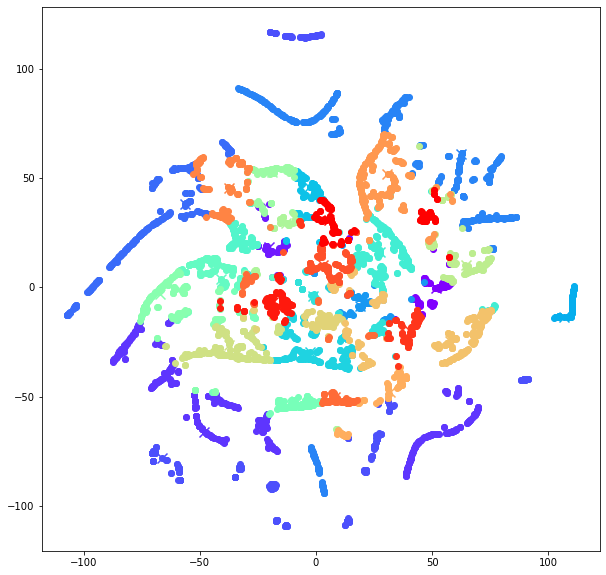

In [36]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

clust_indices = np.unique(clust_labels)

clusters = {clust_ind : [] for clust_ind in clust_indices}
for emb, label in zip(tsne_embeddings, clust_labels):
    clusters[label].append(emb)

for key in clusters.keys():
    clusters[key] = np.array(clusters[key])
colors = cm.rainbow(np.linspace(0, 1, len(clust_indices)))

plt.figure(figsize=(10,10))
for ind, color in zip(clust_indices, colors):
    x = clusters[ind][:,0]
    y = clusters[ind][:,1]
    plt.scatter(x, y, color=color)
    
    centroid = centroids_embeddings[ind]
    plt.scatter(centroid[0],centroid[1], color=color, marker='x', s=100)

plt.show()